<a href="https://colab.research.google.com/github/bpatl/ai-ml-notebooks/blob/main/1_stock_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

Collect Data

In [4]:
df = pd.read_csv("/aapl.us.txt", sep=',')
df = df[df['Date'] > '1990-01-01']
df

,Date,Open,High,Low,Close,Volume,OpenInt
1344,1990-01-02,1.1283,1.2013,1.1206,1.1921,51090928,0
1345,1990-01-03,1.2167,1.2167,1.2013,1.2013,58006332,0
1346,1990-01-04,1.2241,1.2407,1.1921,1.2037,61776401,0
1347,1990-01-05,1.2089,1.2241,1.1845,1.2089,34389635,0
1348,1990-01-08,1.2013,1.2167,1.1845,1.2167,28326921,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.7500,174.3600,171.1000,173.6300,34901241,0
8360,2017-11-07,173.2900,174.5100,173.2900,174.1800,24424877,0
8361,2017-11-08,174.0300,175.6100,173.7100,175.6100,24451166,0
8362,2017-11-09,174.4800,175.4600,172.5200,175.2500,29533086,0


In [5]:
df_close = df.reset_index()['Close']
df_close.head()

,Close
0,1.1921
1,1.2013
2,1.2037
3,1.2089
4,1.2167


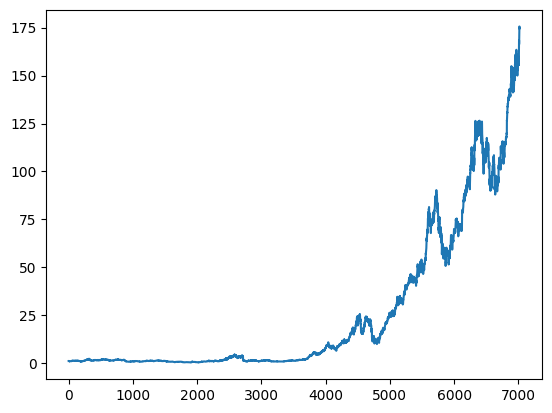

In [6]:
plt.plot(df_close)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
print(df_close)

[[0.00444324]
 [0.00449576]
 [0.00450945]
 ...
 [1.        ]
 [0.99794516]
 [0.99463459]]


Preprocessing Data with Train and Test

In [8]:
train_dataset_size = int(len(df_close) * 0.70)
test_dataset_size = int(len(df_close) - train_dataset_size)
train_data, test_data = df_close[0:train_dataset_size], df_close[train_dataset_size: len(df_close)]

In [9]:
len(train_data)

4914

In [10]:
len(test_data)

2106

In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1 ):
        a = dataset[i: (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[ i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [13]:
display(X_train.shape)
display(Y_train.shape)

display(x_test.shape)
display(y_test.shape)

(4813, 100)

(4813,)

(2005, 100)

(2005,)

Create LSTM Model

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

display(X_train)
display(x_test)

array([[[0.00444324],
        [0.00449576],
        [0.00450945],
        ...,
        [0.00486106],
        [0.00520467],
        [0.00531427]],

       [[0.00449576],
        [0.00450945],
        [0.00453914],
        ...,
        [0.00520467],
        [0.00531427],
        [0.00531427]],

       [[0.00450945],
        [0.00453914],
        [0.00458366],
        ...,
        [0.00531427],
        [0.00531427],
        [0.00494953]],

       ...,

       [[0.0660193 ],
        [0.06815976],
        [0.07052853],
        ...,
        [0.09720146],
        [0.09987275],
        [0.10175635]],

       [[0.06815976],
        [0.07052853],
        [0.07256624],
        ...,
        [0.09987275],
        [0.10175635],
        [0.10140246]],

       [[0.07052853],
        [0.07256624],
        [0.06915864],
        ...,
        [0.10175635],
        [0.10140246],
        [0.10175064]]])

array([[[0.09894807],
        [0.09662496],
        [0.09794348],
        ...,
        [0.14420016],
        [0.14376636],
        [0.14812147]],

       [[0.09662496],
        [0.09794348],
        [0.0973042 ],
        ...,
        [0.14376636],
        [0.14812147],
        [0.14707122]],

       [[0.09794348],
        [0.0973042 ],
        [0.09887958],
        ...,
        [0.14812147],
        [0.14707122],
        [0.14689428]],

       ...,

       [[0.80359179],
        [0.82670871],
        [0.81911723],
        ...,
        [0.95376616],
        [0.9787096 ],
        [0.98869839]],

       [[0.82670871],
        [0.81911723],
        [0.824026  ],
        ...,
        [0.9787096 ],
        [0.98869839],
        [0.99183773]],

       [[0.81911723],
        [0.824026  ],
        [0.82265611],
        ...,
        [0.98869839],
        [0.99183773],
        [1.        ]]])

In [15]:
import tensorflow as tf

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train, Y_train,
          validation_data=(x_test, y_test),
          epochs=2,
          batch_size=64,
          verbose=1,
          )

Epoch 1/2
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 1.5407e-05 - val_loss: 0.0056
Epoch 2/2
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - loss: 1.5647e-05 - val_loss: 0.0048


In [19]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [20]:
train_pred = model.predict(X_train)
test_pred = model.predict(x_test)

train_predict = scaler.inverse_transform(train_pred)
test_predict = scaler.inverse_transform(test_pred)

151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


Predict the test data

In [21]:
math.sqrt(mean_squared_error(Y_train, train_predict))

6.723778939885411

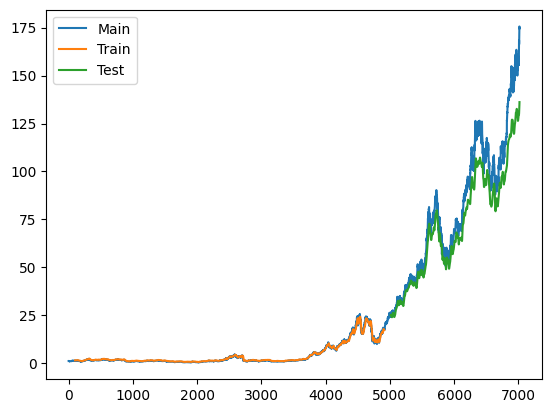

In [22]:
look_back = 100
train_predict_plot = np.empty_like(df_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(df_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+ (look_back*2)+1 : len(df_close)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close), label="Main")
plt.plot(train_predict_plot, label="Train")
plt.plot(test_predict_plot, label="Test")
plt.legend()
plt.show()

Predict the future 90 days and plot output

In [23]:
x_input = test_data[len(test_data)-100 : ].reshape(1, -1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.8226561125649084,
 0.8263662357330066,
 0.8237406101063526,
 0.8119252947864093,
 0.8237976889243234,
 0.8116399006965557,
 0.8135805805075607,
 0.8106124819730822,
 0.813980132233356,
 0.8062174129893351,
 0.8144938415950926,
 0.8194026199405763,
 0.8220853243852011,
 0.8232839795625867,
 0.8347568219747056,
 0.8420058318569896,
 0.8449168515734974,
 0.8478278712900051,
 0.8531932801792548,
 0.8493119205572445,
 0.8489123688314492,
 0.8593007137021241,
 0.8629537580522514,
 0.8670063541281741,
 0.8505676545526007,
 0.8446314574836437,
 0.8402363884998967,
 0.8476566348360929,
 0.8878972015054651,
 0.8789358270840589,
 0.8836162901576596,
 0.8973152064706374,
 0.9045071375349507,
 0.9101008616960834,
 0.8809906645310055,
 0.8933196892126855,
 0.9067902902537803,
 0.9167220045806893,
 0.913011881412591,
 0.8954316054776029,
 0.893433846848627,
 0.8917785611274756,
 0.9063907385279852,
 0.9075323148873999,
 0.9034797188114773,
 0.906847369071751,
 0.9159799799470695,
 0.92419932973485

In [24]:
model.save("stock_prediction_lstm_model.keras")
print("Model saved as stock_prediction_lstm_model.keras")

Model saved as stock_prediction_lstm_model.keras


In [25]:
# Download the generated model
from google.colab import files
files.download("stock_prediction_lstm_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>